In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

READING DATASETS

In [ ]:
#head will display the Top 5 oberservations of the each datasets
# we have multiple datasets here
#order_products__*.csv
#These files specify which products were purchased in each order. 
#order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order 
#that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with 
#no reordered items. See the evaluation page for full details.

#This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.


In [2]:
aisles = pd.read_csv("aisles.csv")

In [3]:
departments = pd.read_csv("departments.csv")

In [4]:
order_products__train = pd.read_csv("order_products__train.csv")

In [7]:
order_products_prior = pd.read_csv("order_products_prior.csv",on_bad_lines="skip")


In [6]:
sample_submission = pd.read_csv("sample_submission.csv")

In [10]:
orders = pd.read_csv("orders.csv")

In [9]:
products = pd.read_csv("products.csv")

In [9]:
#head() will display the Top 5 obeservations of the datasets

In [15]:
aisles.head(134)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [11]:
#to display all the rows 

In [14]:
pd.set_option("display.max_rows",134)

In [13]:
aisles.describe().T

,count,mean,std,min,25%,50%,75%,max
aisle_id,134.0,67.5,38.826537,1.0,34.25,67.5,100.75,134.0


In [16]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2.0,33120.0,1.0,1.0
1,2.0,28985.0,2.0,1.0
2,2.0,9327.0,3.0,0.0
3,2.0,45918.0,4.0,1.0
4,2.0,30035.0,5.0,0.0


In [ ]:
sample_submission.head()

In [ ]:
products.head()

In [ ]:
orders.head()

In [ ]:
#tail() will display the bottom 5 obeservations of the datasets

In [19]:
aisles.tail()
departments.tail()
order_products__train.tail()
order_products_prior.tail()
sample_submission.tail()
products.tail()
orders.tail()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [ ]:
#data.info() helps to understand the data type and information about data, including the number of records in each column, 
#data having null or not null, Data type, the memory usage of the dataset.

In [23]:
aisles.info()
departments.info()
order_products__train.info()
order_products_prior.info()
sample_submission.info()
products.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordere

In [ ]:
# Check for duplicate values using nunique()

In [22]:
departments.nunique()
order_products__train.nunique()
order_products_prior.nunique()
sample_submission.nunique()
products.nunique()
aisles.nunique()
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [24]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [25]:
order_products__train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [26]:
order_products_prior.nunique()

order_id             3214886
product_id             49683
add_to_cart_order        146
reordered                  3
dtype: int64

In [27]:
sample_submission.nunique()

order_id    75000
products        1
dtype: int64

In [28]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [29]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [30]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [ ]:
#isnull().sum()  used to check the missing values in the datasets.

In [31]:
print(orders.isnull().sum())
print(order_products_prior.isnull().sum())
print(products.isnull().sum())
print(departments.isnull().sum())
print(aisles.isnull().sum())
print(order_products__train.isnull().sum())
print(sample_submission.isnull().sum())



order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
order_id              1
product_id            1
add_to_cart_order    11
reordered            33
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
department_id    0
department       0
dtype: int64
aisle_id    0
aisle       0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id    0
products    0
dtype: int64


In [32]:
print(orders.dtypes)

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


In [33]:
print("\nDistribution of 'eval_set' in orders dataset:")
print(orders['eval_set'].value_counts())


Distribution of 'eval_set' in orders dataset:
eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64


In [34]:
# Display basic information about the orders dataset
print("Orders dataset shape:", orders.shape)
print("\nColumns in orders dataset:")
print(orders.columns)



Orders dataset shape: (3421083, 7)

Columns in orders dataset:
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [ ]:
#Merging Data to get more clear view

In [ ]:
#1. Merge orders and order_products_prior w.r.t order_id to link orders with product details

In [74]:
# Merge datasets to get complete order information with product details
merged_order_detail = pd.merge(orders, order_products_prior, on='order_id')
order_details = pd.merge(merged_order_detail, products, on='product_id')

In [ ]:
#BEST SELLER

In [75]:
# Calculate total sales 
calculate_product_sales = order_details['product_name'].value_counts()


In [77]:
best_selling_products = calculate_product_sales.idxmax()

In [80]:
print("The best Seller")
print(best_selling_products)

The best Seller
Banana


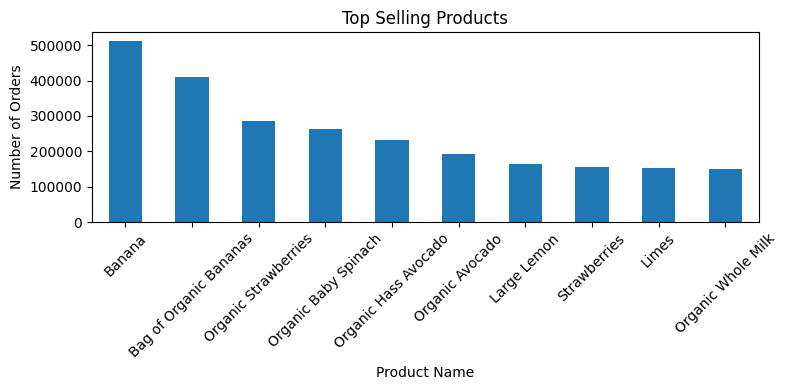

The best selling product is: product_name
Banana    510789
Name: count, dtype: int64


In [82]:
top_products = calculate_product_sales.head(10)  # Displaying top 10 products for example
plt.figure(figsize=(8, 4))
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The best selling product is: {best_selling_product}")

In [ ]:
#BEST DEPARTMENT

In [41]:
# Merge datasets to get complete order information with product and department details
Dept_details = pd.merge(order_products_prior, products, on='product_id')
Dept_details = pd.merge(Dept_details, departments, on='department_id')

# Calculate total sales 
department_sales = Dept_details['department'].value_counts()

# Determine the best department
best_department = department_sales.idxmax() 

In [46]:
print("The best Department")
print(best_department)

The best Department
produce


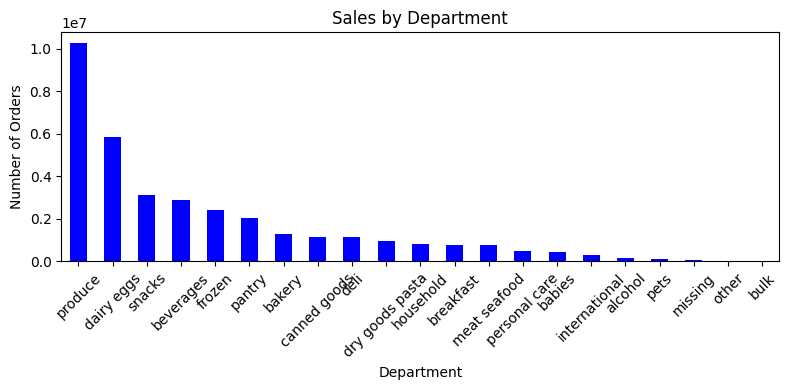

The best department is: produce


In [71]:
plt.figure(figsize=(8, 4))
department_sales.plot(kind='bar',color='blue')
plt.title('Sales by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The best department is: {best_department}")

In [ ]:
#Busiest day of the week 

In [35]:
# Count the number of orders for each day of the week
order_count_by_day = orders['order_dow'].value_counts().sort_index()

# Mapping day of week to names
days_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
order_count_by_day.index = order_count_by_day.index.map(days_map)

# Determine the busiest day
busiest_day = order_count_by_day.idxmax()
max_orders = order_count_by_day.max()


In [55]:
print(busiest_day,max_orders)

Sunday 600905


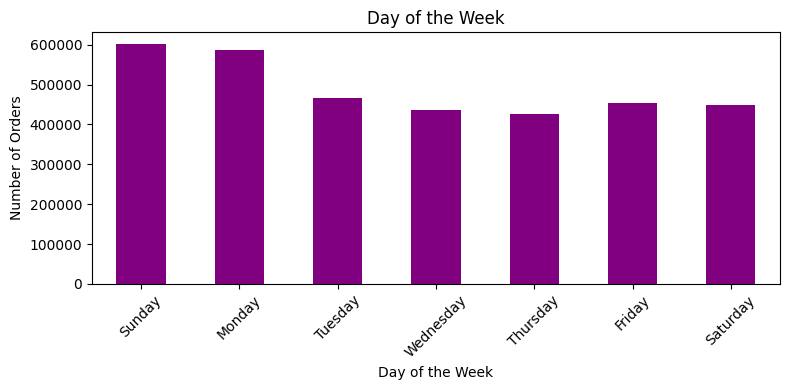

The busiest day of the week is Sunday with 600905 orders.


In [72]:
 #Visualize the order frequencies by day of the week
plt.figure(figsize=(8, 4))
order_count_by_day.plot(kind='bar', color='purple')
plt.title('Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The busiest day of the week is {busiest_day} with {max_orders} orders.")

In [ ]:
#Busiest hour of the day

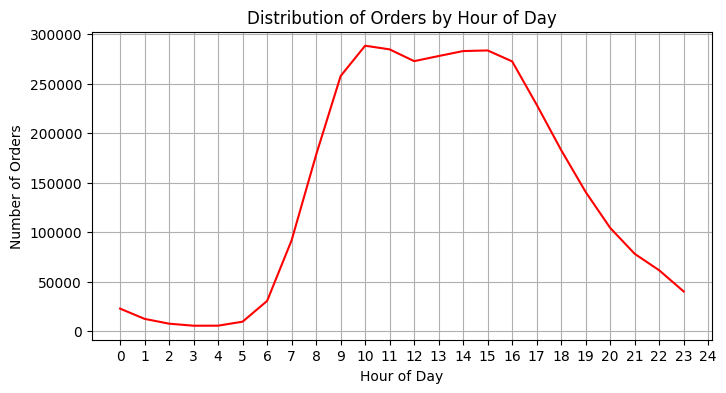

In [73]:
# Count orders by hour of day
order_count_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(8, 4))
sns.lineplot(x=order_count_by_hour.index, y=order_count_by_hour.values, color='red')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 25, 1))
plt.grid(True)
plt.show()

In [ ]:
#Histogram of customer retention (reordering)
#Retention1: Number of Customers vs number of orders
#Retention2: Number of products vs number of reorders

In [ ]:
#Retention1: Number of Customers vs number of orders

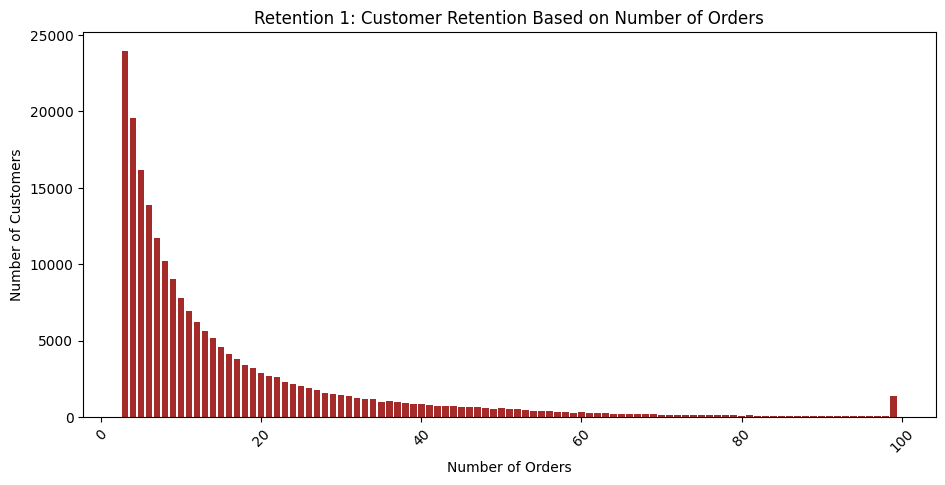

In [98]:

# Calculate number of orders per customer
orders_per_customer = merged_order_detail.groupby('user_id')['order_number'].max().value_counts().sort_index()

# Plotting histogram of number of orders per customer
plt.figure(figsize=(11,5))
plt.bar(orders_per_customer.index, orders_per_customer.values, color='brown')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Retention 1: Customer Retention Based on Number of Orders')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Retention2: Number of products vs number of reorders

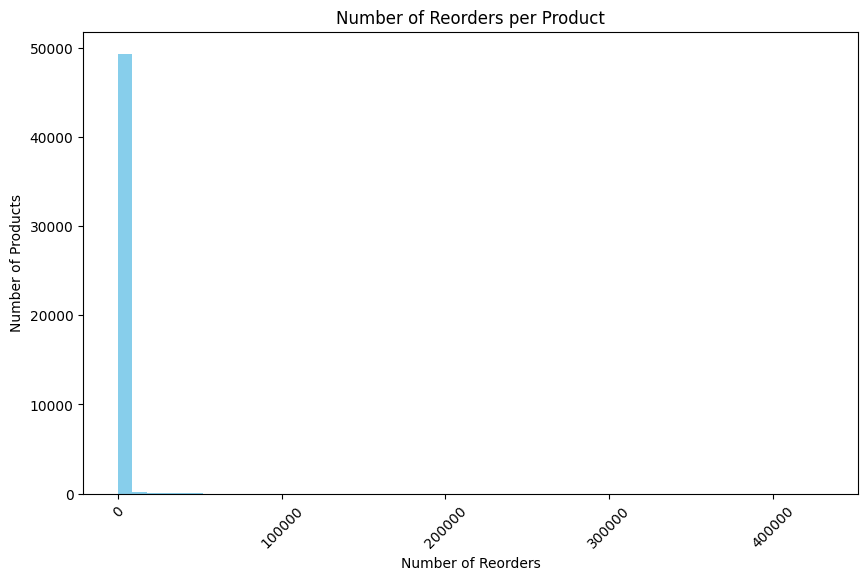

In [51]:
# Calculate reorder for each product
reorder_counts = order_products_prior.groupby('product_id')['reordered'].sum()

# Plot histogram of number of products vs. number of reorders


plt.figure(figsize=(10, 6))
plt.hist(reorder_counts,bins = 50,color='skyblue')
plt.title('Number of Reorders per Product')
plt.xlabel('Number of Reorders')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

                   order_dow  order_hour_of_day  reordered
order_dow           1.000000           0.012028  -0.007129
order_hour_of_day   0.012028           1.000000  -0.023500
reordered          -0.007129          -0.023500   1.000000


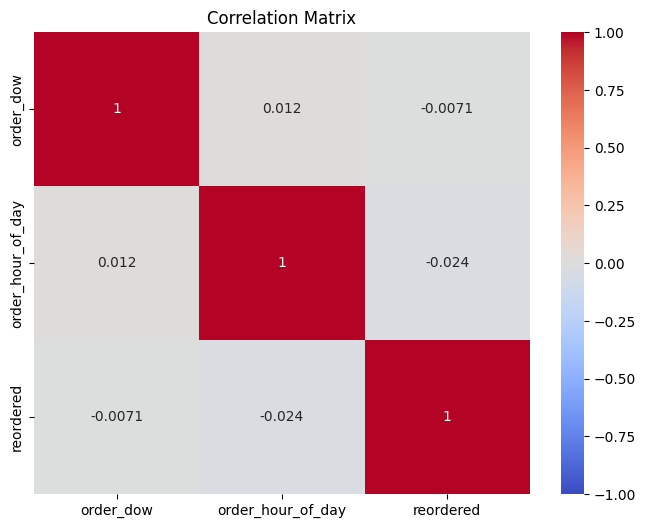

In [12]:
merged = pd.merge(order_products_prior, products, on='product_id')
merged = pd.merge(merged, orders, on='order_id')



numeric_columns = ['order_dow', 'order_hour_of_day', 'reordered']

# Calculate correlation matrix
correlation_matrix = merged[numeric_columns].corr()

# Display correlation matrix
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()